In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

####IMPORT STATEMENTS

In [1]:
import io
import locale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

####Look-up for City Names

In [2]:
jurisdiction_codes = {
    1: 'Carlsbad',2: 'Chula Vista',3: 'Coronado',4: 'Del Mar',5: 'El Cajon',6: 'Encinitas',7: 'Escondido',
    8: 'Imperial Beach',9: 'La Mesa',10: 'Lemon Grove',11: 'National City',12: 'Oceanside',13: 'Poway',
    14: 'San Diego',15: 'San Marcos',16: 'Santee',17: 'Solana Beach',18: 'Vista',19: 'Unincorporated'
}

jurisdictions = pd.Series(jurisdiction_codes, name='jurisdiction')

mode_codes = {
    'Auto SOV (Non-Toll)': (1, 1),'Auto SOV (Toll)': (2, 1),
    'Auto 2 Person (Non-Toll, Non-HOV)': (3, 2),'Auto 2 Person (Non-Toll, HOV)': (4, 2),'Auto 2 Person (Toll, HOV)': (5, 2),
    'Auto 3+ Person (Non-Toll, Non-HOV)': (6, 3),'Auto 3+ Person (Non-Toll, HOV)': (7, 3),'Auto 3+ Person (Toll, HOV)': (8, 3),
    'Walk': (9, 4),'Bike': (10, 5),
    'Walk-Local Bus': (11, 6),'Walk-Express Bus': (12, 6),'Walk-Light Rail': (14, 6),'Walk-Heavy Rail': (15, 6),
    'PNR-Local Bus': (16, 6),'PNR-Express Bus': (17, 6),'PNR-Light Rail': (19, 6),'PNR-Heavy Rail': (20, 6),
    'KNR-Local Bus': (21, 6),'KNR-Express Bus': (22, 6),'KNR-Light Rail': (24, 6),'KNR-Heavy Rail': (25, 6)
}



modes = pd.DataFrame({'mode_id': [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,24,25]
                      ,'super_mode' : ['Drive Alone','Drive Alone','HOV','HOV','HOV','HOV','HOV','HOV','Walk','Bike','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit']}
                    ,index = ['Auto SOV (Non-Toll)','Auto SOV (Toll)'
                             ,'Auto 2 Person (Non-Toll, Non-HOV)','Auto 2 Person (Non-Toll, HOV)','Auto 2 Person (Toll, HOV)'
                             ,'Auto 3+ Person (Non-Toll, Non-HOV)','Auto 3+ Person (Non-Toll, HOV)','Auto 3+ Person (Toll, HOV)'
                             ,'Walk','Bike'
                             ,'Walk-Local Bus','Walk-Express Bus','Walk-Light Rail','Walk-Heavy Rail'
                             ,'PNR-Local Bus','PNR-Express Bus','PNR-Light Rail','PNR-Heavy Rail'
                             ,'KNR-Local Bus','KNR-Express Bus','KNR-Light Rail','KNR-Heavy Rail'
                            ])

####Load up the datasets

In [4]:
locale.setlocale(locale.LC_ALL, '')

base_csv_url = 'E:/Apps/sandag.github.io/transnet/baseline_mandatory_residents.csv'
alt_csv_url = 'E:/Apps/sandag.github.io/transnet/no_i15ml_mandatory_residents.csv'

base_df = pd.read_csv(base_csv_url, index_col='tour_ij_id')
alt_df = pd.read_csv(alt_csv_url, index_col='tour_ij_id')

base_df = pd.merge(base_df, modes, left_on='mode_desc', right_index=True)
alt_df = pd.merge(alt_df, modes, left_on='mode_desc', right_index=True)

####Casual Tour Statistics

In [5]:
print 'Total Number of Mandatory Tours (Base Case): {0:>10,}'.format(len(base_df))
print 'Total Number of Mandatory Tours (Alt Case): {0:>11,}'.format(len(alt_df))

Total Number of Mandatory Tours (Base Case):  1,107,866
Total Number of Mandatory Tours (Alt Case):   1,107,877


####Total Daily Time Change for Workers

In [6]:
daily_min_change = alt_df.tour_time.sum() - base_df.tour_time.sum()

print 'Total Daily Change in Time Spent on Mandatory Tours: {0:>12,.1f} minutes'.format(daily_min_change)
print 'Total Daily Change in Time Spent on Mandatory Tours: {0:>12,.1f} hours'.format(daily_min_change / 60.)

Total Daily Change in Time Spent on Mandatory Tours:    206,948.6 minutes
Total Daily Change in Time Spent on Mandatory Tours:      3,449.1 hours


####Total Annual Time Change for Workers

In [7]:
base_df.loc[:, 'annual_tour_time'] = base_df.tour_time * base_df.weeks_worked * base_df.avg_days_worked
alt_df.loc[:, 'annual_tour_time'] = alt_df.tour_time * alt_df.weeks_worked * alt_df.avg_days_worked

annual_min_change = alt_df.annual_tour_time.sum() - base_df.annual_tour_time.sum()

print 'Total Annual Change in Time Spent on Mandatory Tours: {0:>15,.0f} minutes'.format(annual_min_change)
print 'Total Annual Change in Time Spent on Mandatory Tours: {0:>15,.0f} hours'.format(annual_min_change / 60.)

Total Annual Change in Time Spent on Mandatory Tours:      50,783,848 minutes
Total Annual Change in Time Spent on Mandatory Tours:         846,397 hours


####Total Annual Monetary Savings for Workers
Value of time is derived from person table: hh_income / num_workers / annual_hours_worked

In [8]:
base_df.loc[:, 'annual_commute_cost'] = base_df.derived_hourly_salary * (base_df.annual_tour_time / 60)
alt_df.loc[:, 'annual_commute_cost'] = alt_df.derived_hourly_salary * (alt_df.annual_tour_time / 60)

annual_cost_difference = alt_df.annual_commute_cost.sum() - base_df.annual_commute_cost.sum()

print 'Total Annual Change in User Costs without the Project: {0}'.format(locale.currency(annual_cost_difference, grouping=True))
print 'Average Annual Commuter Savings without the Project: {0}'.format(locale.currency(annual_cost_difference / len(base_df)), grouping=True)

Total Annual Change in User Costs without the Project: $28,502,367.96
Average Annual Commuter Savings without the Project: $25.73


####Total and Average Annual Savings for Commuters by Jurisdiction
Value of time is derived from person table: hh_income / num_workers / annual_hours_worked

In [9]:
base_jurisdiction = base_df[['home_jurisdiction','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('home_jurisdiction').sum()
alt_jurisdiction = alt_df[['home_jurisdiction','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('home_jurisdiction').sum()
base_commuters = base_df[['home_jurisdiction','annual_commute_cost']].groupby('home_jurisdiction').count()
base_commuters.columns = ['commuters']

jurisdiction_diff = alt_jurisdiction - base_jurisdiction
jurisdiction_diff = jurisdiction_diff.join(jurisdictions)
print jurisdiction_diff[['jurisdiction','annual_commute_cost']].to_string(formatters={'annual_commute_cost': '${:,.2f}'.format})

commuter_savings = jurisdiction_diff['annual_commute_cost'] / base_commuters['commuters']
print pd.concat([jurisdictions, commuter_savings], axis=1, keys=['jurisdiction','avg_annual_commute_savings']).to_string(formatters={'avg_annual_commute_savings': '${:,.2f}'.format})

                     jurisdiction annual_commute_cost
home_jurisdiction                                    
1                        Carlsbad       $1,346,937.39
2                     Chula Vista         $922,360.28
3                        Coronado          $10,594.71
4                         Del Mar         $298,205.09
5                        El Cajon        $-435,987.38
6                       Encinitas        $-561,501.36
7                       Escondido       $9,780,589.66
8                  Imperial Beach         $103,064.03
9                         La Mesa        $-873,475.32
10                    Lemon Grove         $452,344.26
11                  National City         $291,835.65
12                      Oceanside       $2,353,223.84
13                          Poway       $1,573,488.17
14                      San Diego       $8,939,904.30
15                     San Marcos       $1,574,057.65
16                         Santee        $-136,785.15
17                   Solana 

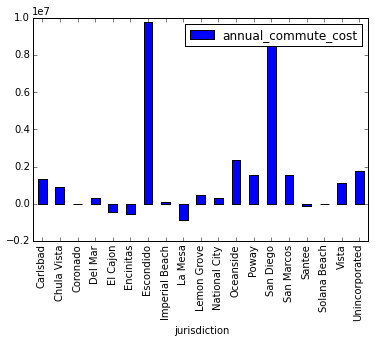

In [10]:
jurisdiction_diff[['jurisdiction','annual_commute_cost']].plot(kind='bar', y='annual_commute_cost', x='jurisdiction')

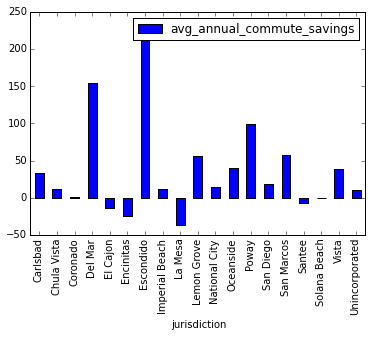

In [11]:
pd.concat([jurisdictions, commuter_savings], axis=1, keys=['jurisdiction','avg_annual_commute_savings']).plot(kind='bar', x='jurisdiction')

In [12]:
base_mode_sum = base_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('super_mode').sum()
alt_mode_sum = alt_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('super_mode').sum()

alt_mode_sum - base_mode_sum

,tour_time,annual_tour_time,annual_commute_cost
super_mode,,,
Bike,9445.608000,2362019.714000,308640.150556
Drive Alone,48263.496721,14215044.538064,8725283.718898
HOV,135951.686958,31297072.341239,18390263.171701
Transit,17096.567559,3863712.405485,1152617.368644
Walk,-3808.804202,-954001.328466,-74436.451539


In [13]:
base_mode = base_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost','tour_distance']].groupby('super_mode').agg(['count','mean','sum'])
alt_mode = alt_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost', 'tour_distance']].groupby('super_mode').agg(['count', 'mean','sum'])
base_mode

tour_time                              annual_tour_time  \
                count        mean              sum            count   
super_mode                                                            
Bike            14385   37.856062    544559.458000            14385   
Drive Alone    704642   50.410824  35521584.098408           704642   
HOV            316258   49.039920  15509267.008630           316258   
Transit         36931  111.360357   4112649.328931            36931   
Walk            35650   37.748578   1345736.788285            35650   

                                        annual_commute_cost               \
                     mean           sum               count         mean   
super_mode                                                                 
Bike          8082.532017  1.162672e+08               14385  3490.993241   
Drive Alone  11658.788654  8.215272e+09              704642  6874.263946   
HOV          11187.257663  3.538060e+09              316258  5937.012172   
Transit      24126.439655  8.910135e+08               36931  9440.669019   
Walk          7234.566461  2.579123e+08               35650  2495.986470   

                          tour_distance                              
                      sum         count       mean              sum  
super_mode                                                           
Bike         5.021794e+07         14385   7.571212    108911.891527  
Drive Alone  4.843895e+09        704642  26.310874  18539747.110046  
HOV          1.877628e+09        316258  25.580671   8090091.871794  
Transit      3.486533e+08         36931  17.395971    642450.590613  
Walk         8.898192e+07         35650   1.887429     67286.839703

In [14]:
alt_mode

tour_time                              annual_tour_time  \
                count        mean              sum            count   
super_mode                                                            
Bike            14609   37.922176    554005.066000            14609   
Drive Alone    703237   50.580171  35569847.595130           703237   
HOV            317496   49.276900  15645218.695588           317496   
Transit         36963  111.726480   4129745.896490            36963   
Walk            35572   37.724277   1341927.984083            35572   

                                        annual_commute_cost               \
                     mean           sum               count         mean   
super_mode                                                                 
Bike          8120.284946  1.186292e+08               14609  3458.592506   
Drive Alone  11702.295527  8.229487e+09              703237  6900.405381   
HOV          11242.210315  3.569357e+09              317496  5971.785026   
Transit      24210.081847  8.948773e+08               36963  9463.678946   
Walk          7223.611071  2.569583e+08               35572  2499.366951   

                          tour_distance                              
                      sum         count       mean              sum  
super_mode                                                           
Bike         5.052658e+07         14609   7.584435    110801.013153  
Drive Alone  4.852620e+09        703237  26.120188  18368682.452643  
HOV          1.896018e+09        317496  25.324541   8040440.331319  
Transit      3.498060e+08         36963  17.320282    640209.593911  
Walk         8.890748e+07         35572   1.886214     67096.399500

In [15]:
alt_mode - base_mode

tour_time                          annual_tour_time             \
                count      mean            sum            count       mean   
super_mode                                                                   
Bike              224  0.066113    9445.608000              224  37.752929   
Drive Alone     -1405  0.169346   48263.496721            -1405  43.506873   
HOV              1238  0.236980  135951.686958             1238  54.952652   
Transit            32  0.366124   17096.567559               32  83.642192   
Walk              -78 -0.024300   -3808.804202              -78 -10.955390   

                             annual_commute_cost                              \
                         sum               count       mean              sum   
super_mode                                                                     
Bike          2362019.714000                 224 -32.400735    308640.150556   
Drive Alone  14215044.538064               -1405  26.141435   8725283.718898   
HOV          31297072.341239                1238  34.772854  18390263.171701   
Transit       3863712.405485                  32  23.009928   1152617.368644   
Walk          -954001.328466                 -78   3.380482    -74436.451539   

            tour_distance                           
                    count      mean            sum  
super_mode                                          
Bike                  224  0.013223    1889.121626  
Drive Alone         -1405 -0.190687 -171064.657404  
HOV                  1238 -0.256131  -49651.540475  
Transit                32 -0.075688   -2240.996703  
Walk                  -78 -0.001215    -190.440204

In [16]:
print 'Total Daily Change in Person Miles Traveled (PMT) on Mandatory Tours: {0:>12,.1f} miles'.format(alt_df.tour_distance.sum() - base_df.tour_distance.sum())

Total Daily Change in Person Miles Traveled (PMT) on Mandatory Tours:   -221,258.5 miles
